# Systems Analysis & Design
## Final Project
### Elise, Mohsin & Nicolas

This project is aimed to predict wether a person is susceptible to get a stroke based on a few input variables.

<h2>1. Preparing the problem:</h2>
<h4> Import the dependencies:</h4>

In [348]:
# importing the dependencies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

<h4> Load Dataset:</h4>

In [168]:
# importing the data set:
df = pd.read_csv('https://raw.githubusercontent.com/momokamalz/Systems-Analysis-and-Design-Stroke-Prediction/main/healthcare-dataset-stroke-data.csv')

In [169]:
# printing the first five rows of the data:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


A quick look at the data reveals that we have a few missing values in the bmi column so lets go ahead and explore how many missing values we have in total.

<h2>2. Summarize Data / Exploratory Data Analysis:</h2>
<h4> Descriptive Statistics:</h4>

In [170]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


A quick look at the age column reveals that the maximum aged person is 82 and 75 % of the population is aged 61 or lower, while 25 % of the population is aged 25.

<h4>Data Visualizations:</h4>

[Text(0.5, 1.0, 'Age VS hypertension'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Hypertension')]

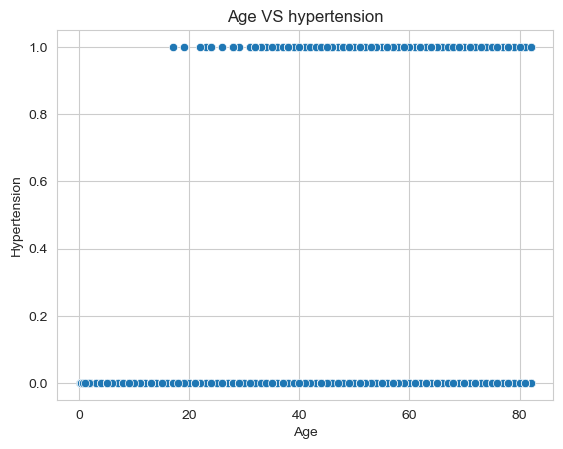

In [241]:
sns.scatterplot(data=df, x="age", y="hypertension").set(title='Age VS hypertension', xlabel='Age', ylabel='Hypertension')

[Text(0.5, 1.0, 'Age VS heart disease'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Heart Disease')]

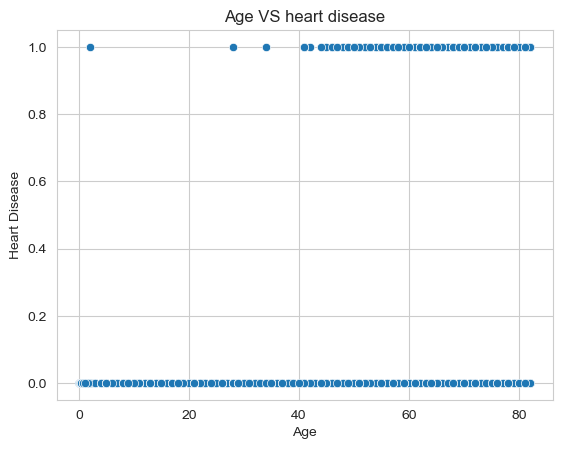

In [239]:
sns.scatterplot(data=df, x="age", y="heart_disease").set(title='Age VS heart disease', xlabel='Age', ylabel='Heart Disease')

<h2>3. Prepare Data:</h2>
<h3>Data Cleaning</h3>
<h4>Missing Values:</h4>

In [171]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

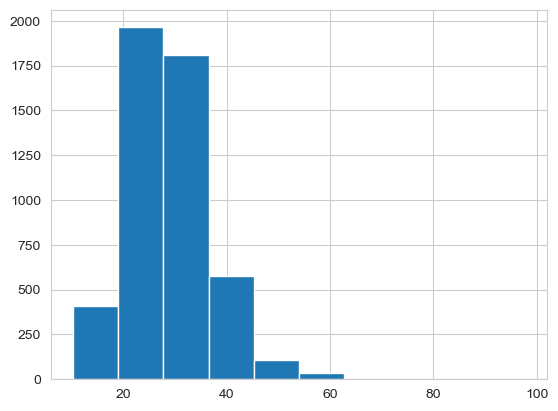

In [172]:
plt.hist(df['bmi'])
plt.show()

<h4>Replacing missing values with the mean:</h4>

In [173]:
df.bmi.fillna(df.bmi.mean(), inplace=True)

In [174]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [175]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<h4>Dropping unrelevant features</h4>

Since the id column adds no significance to our model, we will go ahead and delete it. 

In [176]:
df = df.drop('id', axis=1)

In [177]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<h4>Checking for Duplicates</h4>

In [178]:
df.duplicated().sum()

0

<h3>Data Transformations:</h3>

In [179]:
categorical = df.select_dtypes(exclude=[np.number])
categorical

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [180]:
for col in categorical.columns:
    print(categorical[col].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Lets also get a count of all these categorical variables:

In [181]:
for col in categorical.columns:
    print(categorical[col].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


A quick analysis of the gender column reveals that we have category named 'other' which is only 1 in count and can be deleted since it has no significance to our model building. Lets also plot this to visualize it: 

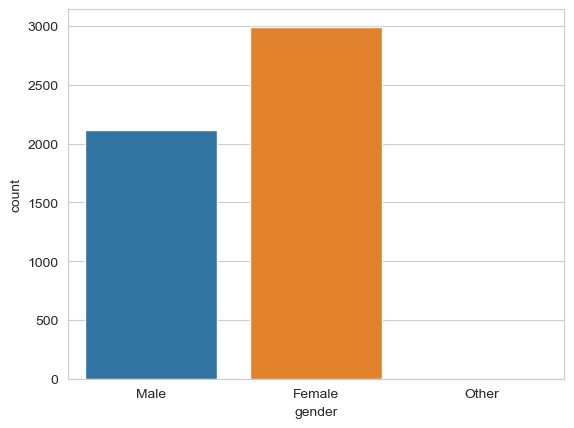

In [182]:
sns.set_style('whitegrid')
sns.countplot(data=categorical, x='gender')
plt.show()

In [188]:
# Lets go ahead and drop the gender named other:
df.drop(df.loc[df['gender'] == 'Other'].index, inplace = True)
df = df.reset_index(drop=True)

In [189]:
categorical_cleaned = df.select_dtypes(exclude=[np.number])
categorical_cleaned.gender.unique()

array(['Male', 'Female'], dtype=object)

In [190]:
numerical = df.select_dtypes(include=[np.number])
numerical

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5104,80.0,1,0,83.75,28.893237,0
5105,81.0,0,0,125.20,40.000000,0
5106,35.0,0,0,82.99,30.600000,0
5107,51.0,0,0,166.29,25.600000,0


In [194]:
# Lets convert our categorical features into numerical ones using get dummmies.

categorical_dummies = pd.get_dummies(categorical_cleaned)

In [195]:
categorical_dummies

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5105,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5106,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5107,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [196]:
# Lets scale the numerical features like age, avg_glucose_level and bmi

sc = StandardScaler()
numerical_scaled = sc.fit_transform(numerical[['age','avg_glucose_level', 'bmi']])
numerical_scaled

array([[ 1.05124201e+00,  2.70644995e+00,  1.00104066e+00],
       [ 7.85888689e-01,  2.12165168e+00, -1.65111256e-04],
       [ 1.62617420e+00, -4.86741416e-03,  4.68398925e-01],
       ...,
       [-3.63975698e-01, -5.11265616e-01,  2.21564950e-01],
       [ 3.43633155e-01,  1.32837547e+00, -4.27998141e-01],
       [ 3.40542820e-02, -4.60692049e-01, -3.50050570e-01]])

In [197]:
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=['age','avg_glucose_level', 'bmi'])
numerical_scaled_df

,age,avg_glucose_level,bmi
0,1.051242,2.706450,1.001041
1,0.785889,2.121652,-0.000165
2,1.626174,-0.004867,0.468399
3,0.255182,1.437473,0.715233
4,1.581949,1.501297,-0.635858
...,...,...,...
5104,1.626174,-0.494481,-0.000165
5105,1.670400,0.420922,1.442744
5106,-0.363976,-0.511266,0.221565
5107,0.343633,1.328375,-0.427998


In [198]:
df_other = df[['hypertension', 'heart_disease', 'stroke']]
df_other

,hypertension,heart_disease,stroke
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,1,0,1
...,...,...,...
5104,1,0,0
5105,0,0,0
5106,0,0,0
5107,0,0,0


Since both our categorical and numerical attributes have been cleaned and transformed, lets merge them into a new dataframe:

In [203]:
df_scaled = pd.concat([categorical_dummies, numerical_scaled_df, df_other], axis=1)

In [204]:
df_scaled

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1.051242,2.706450,1.001041,0,1,1
1,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0.785889,2.121652,-0.000165,0,0,1
2,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,1.626174,-0.004867,0.468399,0,1,1
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0.255182,1.437473,0.715233,0,0,1
4,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1.581949,1.501297,-0.635858,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1.626174,-0.494481,-0.000165,1,0,0
5105,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1.670400,0.420922,1.442744,0,0,0
5106,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,-0.363976,-0.511266,0.221565,0,0,0
5107,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0.343633,1.328375,-0.427998,0,0,0


<h4>Lets check the target class imbalance</h4>

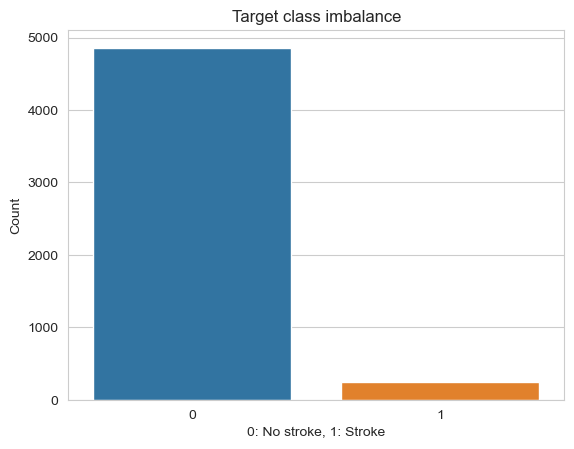

In [206]:
sns.countplot(data=df_scaled, x='stroke').set(title='Target class imbalance', xlabel='0: No stroke, 1: Stroke', ylabel='Count')
plt.show()

This is a highly imbalanced dataset which will pose problems like poor performance metrics, overfitting etc so we must balance this dataset using SMOTE.

In [209]:
smote = SMOTE(sampling_strategy='minority', random_state=42)

X_resample,y_resample = smote.fit_resample(df_scaled.drop(columns=['stroke']),df_scaled['stroke'])
df_resample = pd.concat([pd.DataFrame(y_resample), pd.DataFrame(X_resample)], axis=1)

In [211]:
df_resample.shape

(9720, 21)

In [212]:
df_scaled.shape

(5109, 21)

In [216]:
print(f"After using Smote we created synthetic data points to balance the dataset which gave us an additional {df_resample.shape[0]- df_scaled.shape[0]} additional rows")

After using Smote we created synthetic data points to balance the dataset which gave us an additional 4611 additional rows


[Text(0.5, 1.0, 'Balanced target class'),
 Text(0.5, 0, '0: No stroke, 1: Stroke'),
 Text(0, 0.5, 'Count')]

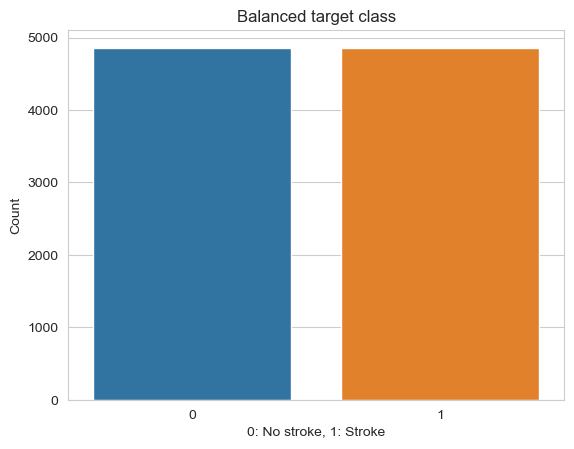

In [218]:
# lets visualize the target class to confirm this
sns.countplot(data=df_resample, x='stroke').set(title='Balanced target class', xlabel='0: No stroke, 1: Stroke', ylabel='Count')

<h2>4. Model Building and Evaluate Algorithms</h2>
<h3>Split out train, validate and test sets</h3>


In [221]:
x = df_resample.drop(columns=['stroke'])
target_label = df_resample['stroke']


# dividing the dataset into train, test, validate with 0.6, 0.2, 0.2
X, X_test, y, y_test = train_test_split(x,target_label,test_size=0.2,train_size=0.8, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size = 0.25,train_size =0.75, random_state=42)


In [222]:
# Lets check the shapes of our train, test, validate sets:
X_train.shape, X_validate.shape, X_test.shape

((5832, 20), (1944, 20), (1944, 20))

In [223]:
y_train.shape, y_validate.shape, y_test.shape

((5832,), (1944,), (1944,))


<h4>Model 1: Decision Tree Classifier</h4>

In [318]:
dtree_clf = DecisionTreeClassifier()

dtree_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_validate)


In [319]:
# Spot Checking algorithm:
accuracy_dt = accuracy_score(y_validate, y_pred_dt)

accuracy_dt

0.8868312757201646

<h4> Model 2: Random Forest </h4>

In [334]:
rnd_clf = RandomForestClassifier() 
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

accuracy_rdn_clf = accuracy_score(y_test, y_pred_rf)

accuracy_rdn_clf

0.9439300411522634

<h4>Model 3: Neural Network</h4>

In [346]:
# Finding out the input layer dimensions:
n_features = X_train.shape[1]
n_features

20

In [349]:
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compiling the model:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fitting the model with a batch size of 16 and 200 epochs
model.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
365/365 [==============================] - 1s 1ms/step - loss: 0.5434 - accuracy: 0.7303
Epoch 2/200
365/365 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8006
Epoch 3/200
365/365 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8188
Epoch 4/200
365/365 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8321
Epoch 5/200
365/365 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8388
Epoch 6/200
365/365 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8455
Epoch 7/200
365/365 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8537
Epoch 8/200
365/365 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8561
Epoch 9/200
365/365 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8625
Epoch 10/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2950 - accura

365/365 [==============================] - 0s 1ms/step - loss: 0.2035 - accuracy: 0.9105
Epoch 82/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9088
Epoch 83/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2039 - accuracy: 0.9119
Epoch 84/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2035 - accuracy: 0.9105
Epoch 85/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.9102
Epoch 86/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2006 - accuracy: 0.9108
Epoch 87/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9124
Epoch 88/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9096
Epoch 89/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2024 - accuracy: 0.9107
Epoch 90/200
365/365 [==============================] - 0s 1ms/step - loss: 0.2014 - accuracy: 

365/365 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.9168
Epoch 161/200
365/365 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9239
Epoch 162/200
365/365 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9187
Epoch 163/200
365/365 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9182
Epoch 164/200
365/365 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9180
Epoch 165/200
365/365 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.9191
Epoch 166/200
365/365 [==============================] - 0s 1ms/step - loss: 0.1860 - accuracy: 0.9199
Epoch 167/200
365/365 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9191
Epoch 168/200
365/365 [==============================] - 0s 1ms/step - loss: 0.1850 - accuracy: 0.9194
Epoch 169/200
365/365 [==============================] - 0s 1ms/step - loss: 0.1851 - a

In [350]:
#Spot checking the 

loss, accuracy = model.evaluate(X_validate, y_validate)
loss, accuracy

61/61 [==============================] - 0s 938us/step - loss: 0.2369 - accuracy: 0.9048


(0.23694586753845215, 0.9048354029655457)

<h2>5. Improve Performance</h2>
<h4>Algorithm tuning</h4>
<h4>5.1 Decision Tree Classifier </h4>

In [336]:
param_grid = {'max_depth': [100, 200, 300, 400, 500],
              'min_samples_split': [100, 200, 300, 400, 500],
              'max_leaf_nodes':[100, 200, 300, 400, 500],
              'criterion': ['gini', 'entropy']}

new_dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy')

new_dt_clf.fit(X_train, y_train)

print(new_dt_clf.best_params_)

{'criterion': 'entropy', 'max_depth': 100, 'max_leaf_nodes': 200, 'min_samples_split': 100}


In [342]:
dtree_clf_n = DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_split=100, max_leaf_nodes=200, random_state=42)

dtree_clf_n.fit(X_train, y_train)

y_pred_dt_n = dtree_clf_n.predict(X_validate)


accuracy_score(y_validate, y_pred_dt_n)

0.8652263374485597

<h4>5.2 Random Forest: </h4>

In [340]:
param_grid_rdm = { 
    'n_estimators': [200, 300, 400, 500, 600],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [100, 200, 300, 400, 500],
    'criterion' :['gini', 'entropy']}

new_rdm_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rdm, scoring='accuracy')

new_rdm_clf.fit(X_train, y_train)

print(new_dt_clf.best_params_)

{'criterion': 'entropy', 'max_depth': 100, 'max_leaf_nodes': 200, 'min_samples_split': 100}


In [343]:
rdm_clf_n = RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_split=100, max_leaf_nodes=200, random_state=42)

rdm_clf_n.fit(X_train, y_train)

y_pred_rdm_n = rdm_clf_n.predict(X_validate)


accuracy_score(y_validate, y_pred_rdm_n)

0.8683127572016461

<h4>5.3 Neural Network: </h4>

In [351]:
# optimizing the neural network:
model = Sequential()
model.add(Dense(128, input_dim=20, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=20, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_validate, y_validate))

Epoch 1/200
365/365 [==============================] - 2s 2ms/step - loss: 1.2145 - accuracy: 0.7265 - val_loss: 0.6591 - val_accuracy: 0.7994
Epoch 2/200
365/365 [==============================] - 1s 2ms/step - loss: 0.6072 - accuracy: 0.8006 - val_loss: 0.5297 - val_accuracy: 0.8143
Epoch 3/200
365/365 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.8085 - val_loss: 0.4992 - val_accuracy: 0.8138
Epoch 4/200
365/365 [==============================] - 1s 2ms/step - loss: 0.5111 - accuracy: 0.8143 - val_loss: 0.4971 - val_accuracy: 0.8138
Epoch 5/200
365/365 [==============================] - 1s 2ms/step - loss: 0.5013 - accuracy: 0.8164 - val_loss: 0.4620 - val_accuracy: 0.8328
Epoch 6/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.8189 - val_loss: 0.4477 - val_accuracy: 0.8400
Epoch 7/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4811 - accuracy: 0.8282 - val_loss: 0.4413 - val_accuracy: 0.8374

Epoch 58/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8633 - val_loss: 0.3617 - val_accuracy: 0.8760
Epoch 59/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4108 - accuracy: 0.8620 - val_loss: 0.3626 - val_accuracy: 0.8801
Epoch 60/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4108 - accuracy: 0.8632 - val_loss: 0.3645 - val_accuracy: 0.8812
Epoch 61/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4109 - accuracy: 0.8611 - val_loss: 0.3562 - val_accuracy: 0.8863
Epoch 62/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.8649 - val_loss: 0.3731 - val_accuracy: 0.8740
Epoch 63/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4085 - accuracy: 0.8627 - val_loss: 0.3607 - val_accuracy: 0.8843
Epoch 64/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4070 - accuracy: 0.8623 - val_loss: 0.3758 - val_accuracy:

Epoch 115/200
365/365 [==============================] - 1s 2ms/step - loss: 0.4011 - accuracy: 0.8570 - val_loss: 0.3558 - val_accuracy: 0.8760
Epoch 116/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3997 - accuracy: 0.8549 - val_loss: 0.3508 - val_accuracy: 0.8832
Epoch 117/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8661 - val_loss: 0.3524 - val_accuracy: 0.8760
Epoch 118/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3949 - accuracy: 0.8637 - val_loss: 0.3598 - val_accuracy: 0.8729
Epoch 119/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8668 - val_loss: 0.3513 - val_accuracy: 0.8771
Epoch 120/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3946 - accuracy: 0.8627 - val_loss: 0.3525 - val_accuracy: 0.8771
Epoch 121/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8620 - val_loss: 0.3478 - val_ac

365/365 [==============================] - 1s 2ms/step - loss: 0.3866 - accuracy: 0.8690 - val_loss: 0.3414 - val_accuracy: 0.8868
Epoch 172/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8582 - val_loss: 0.3421 - val_accuracy: 0.8848
Epoch 173/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.8663 - val_loss: 0.3701 - val_accuracy: 0.8544
Epoch 174/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3923 - accuracy: 0.8628 - val_loss: 0.3546 - val_accuracy: 0.8796
Epoch 175/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8651 - val_loss: 0.3346 - val_accuracy: 0.8858
Epoch 176/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3912 - accuracy: 0.8656 - val_loss: 0.3384 - val_accuracy: 0.8940
Epoch 177/200
365/365 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8649 - val_loss: 0.3682 - val_accuracy: 0.8534

In [352]:
# Evaluating the improved neural network:
loss, accuracy = model.evaluate(X_validate, y_validate)
loss, accuracy

61/61 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8940


(0.33889663219451904, 0.894032895565033)

<h4>Predictions on the hold out test set</h4>
<h4>Decision Tree Classifier:</h4>

In [338]:
# Lets test the decision tree classifier on the test set which is our final hold out set
y_pred_dt_test = dtree_clf_n.predict(X_test)

accuracy_score(y_test, y_pred_dt_test)

0.8770576131687243

Evaluation: Our test set performed slightly better compared to the validation set. 

<h4>Predictions on the hold out test set</h4>
<h4>Random Forest Classifier:</h4>

In [345]:
# Lets test the Random Forest classifier on the test set which is our final hold out set
y_pred_rdm_test = rdm_clf_n.predict(X_test)


accuracy_score(y_test, y_pred_rdm_test)

0.8755144032921811

<h4>Predictions on the hold out test set</h4>
<h4>Neural Network: </h4>

In [357]:
# Lets test the Neural Network on the test set which is our final hold out set
nn_pred = model.predict(X_test)

binary_predictions = [1 if x > 0.5 else 0 for x in nn_pred]

nn_accuracy = accuracy_score(y_test, binary_predictions)

nn_accuracy

61/61 [==============================] - 0s 888us/step


0.875

<h3>Conclusion:<h3>

Since The decision tree classifier scored slightly better on the test set we will choose that as the final model.